## problem 1

In [3]:
# Auto MPG Dataset - Hierarchical Clustering Analysis

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model_year', 'origin', 'car_name']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

df = pd.read_csv(url, sep='\\s+', names=column_names, na_values='?')

# Step 3: Select continuous features
continuous_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
df_cont = df[continuous_cols]

# Step 4: Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_cont), columns=continuous_cols)

# Step 5: Hierarchical Clustering
model = AgglomerativeClustering(n_clusters=3, linkage='average')
cluster_labels = model.fit_predict(df_imputed)
df['cluster'] = cluster_labels

# Step 6: Cluster statistics (mean and variance)
cluster_stats = df.groupby('cluster')[continuous_cols].agg(['mean', 'var'])
print("Cluster Mean and Variance:")
print(cluster_stats)

# Step 7: Origin statistics for comparison
origin_stats = df.groupby('origin')[continuous_cols].agg(['mean', 'var'])
print("\nOrigin Mean and Variance:")
print(origin_stats)

# Step 8: Cross-tabulation between cluster and origin
crosstab = pd.crosstab(df['cluster'], df['origin'])
print("\nCluster vs Origin Cross-tab:")
print(crosstab)


Cluster Mean and Variance:
               mpg            displacement               horsepower  \
              mean        var         mean          var        mean   
cluster                                                               
0        27.365414  41.976309   131.934211  2828.083391   83.834615   
1        13.889062   3.359085   358.093750  2138.213294  167.046875   
2        17.510294   8.829892   278.985294  2882.492318  124.470588   

                          weight                acceleration             
                var         mean            var         mean        var  
cluster                                                                  
0        368.053623  2459.511278  182632.099872    16.298120   5.718298  
1        756.521577  4398.593750   74312.340278    13.025000   3.591429  
2        713.088674  3624.838235   37775.809263    15.105882  10.556980  

Origin Mean and Variance:
              mpg            displacement               horsepower  \
     

## problem 2

k=2, Silhouette Score=0.3601
k=3, Silhouette Score=0.2448
k=4, Silhouette Score=0.2275
k=5, Silhouette Score=0.2389
k=6, Silhouette Score=0.2291


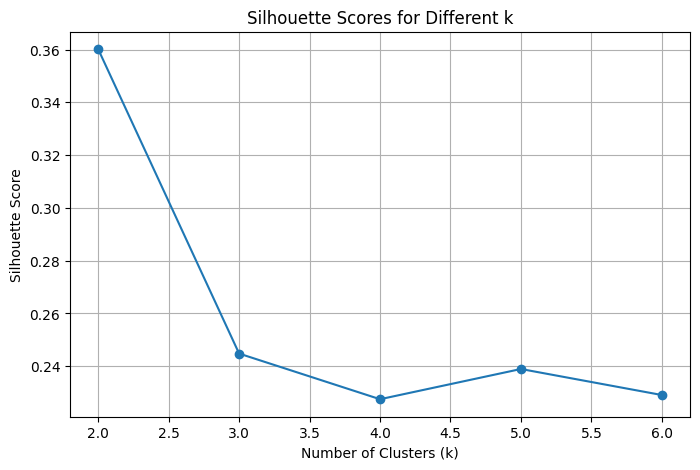


Cluster Feature Means:
             crim         zn      indus      chas       nox        rm  \
cluster                                                                 
0        0.261172  17.477204   6.885046  0.069909  0.487011  6.455422   
1        9.844730   0.000000  19.039718  0.067797  0.680503  5.967181   

               age       dis        rad         tax    ptratio           b  \
cluster                                                                      
0        56.339210  4.756868   4.471125  301.917933  17.837386  386.447872   
1        91.318079  2.007242  18.988701  605.858757  19.604520  301.331695   

             lstat       medv  
cluster                        
0         9.468298  25.749848  
1        18.572768  16.553107  

Centroid Coordinates (scaled features):
       crim        zn     indus      chas       nox        rm       age  \
0 -0.390124  0.262392 -0.620368  0.002912 -0.584675  0.243315 -0.435108   
1  0.725146 -0.487722  1.153113 -0.005412  1.086769

In [6]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset from CSV
boston_df = pd.read_csv("Boston.csv")

# Step 3: Drop index column if present
if 'Unnamed: 0' in boston_df.columns:
    boston_df = boston_df.drop(columns=['Unnamed: 0'])

# Step 4: Extract features (exclude target 'medv')
X = boston_df.drop(columns=['medv'])

# Step 5: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Evaluate K from 2 to 6 using Silhouette Score
silhouette_scores = []
K_range = range(2, 7)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"k={k}, Silhouette Score={score:.4f}")

# Step 7: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 8: Choose optimal k and analyze clusters
optimal_k = K_range[np.argmax(silhouette_scores)]
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(X_scaled)

# Add cluster labels to original DataFrame
X_clustered = boston_df.copy()
X_clustered['cluster'] = labels_optimal

# Step 9: Compute mean of each feature in each cluster
cluster_means = X_clustered.groupby('cluster').mean()
print("\nCluster Feature Means:")
print(cluster_means)

# Step 10: Centroid coordinates in scaled feature space
print("\nCentroid Coordinates (scaled features):")
centroids_scaled = pd.DataFrame(kmeans_optimal.cluster_centers_, columns=X.columns)
print(centroids_scaled)

# Step 11: Inverse transform centroids to original feature space
centroids_original = pd.DataFrame(scaler.inverse_transform(kmeans_optimal.cluster_centers_),
                                  columns=X.columns)
print("\nCentroid Coordinates (original feature space):")
print(centroids_original)


## problem 3

In [7]:
# First, let's import the necessary libraries and load the Wine dataset
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score
import pandas as pd

# Load the Wine dataset
wine = load_wine()

# Convert it into a pandas DataFrame for easier handling
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Standardize the data
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_df)

# Perform K-Means clustering with k=3 (as per the task)
kmeans = KMeans(n_clusters=3, random_state=42)
wine_clusters = kmeans.fit_predict(wine_scaled)

# Calculate Homogeneity and Completeness scores
homogeneity = homogeneity_score(wine.target, wine_clusters)
completeness = completeness_score(wine.target, wine_clusters)

# Prepare results
homogeneity, completeness, wine_clusters[:10]  # Show first 10 cluster assignments for preview


(0.8788432003662366, 0.8729636016078731, array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))